In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
data = pd.read_csv("./input/train.csv")

Label: 1


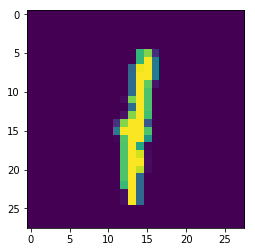

In [8]:
def plot_img(i, X=X, Y=Y):
    print("Label: {}".format(Y[i]))
    plt.close()
    plt.figure()
    plt.imshow(X[i,:,:])
    plt.show()

plot_img(12)

In [3]:
m = len(data)
X = np.array(data.loc[:, data.columns != 'label'])
X = X.reshape(m, 28, 28)
Y = np.array(data['label'])

In [4]:
print("Shape of X: {}, shape of Y: {}".format(X.shape, Y.shape))

Shape of X: (42000, 28, 28), shape of Y: (42000,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [6]:
print("Shape of X_train: {}, shape of y_train: {}".format(X_train.shape, y_train.shape))
print("Shape of X_test: {}, shape of y_test: {}".format(X_test.shape, y_test.shape))

Shape of X_train: (31500, 28, 28), shape of y_train: (31500,)
Shape of X_test: (10500, 28, 28), shape of y_test: (10500,)


In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [9]:
def cnn_model(features, labels, mode):
    #input layer
    input_layer = tf.reshape(features['x'], [-1, 28, 28, 1])
    
    #conv layer 1
    conv1 = tf.layers.conv2d(inputs=input_layer, filters=32, kernel_size=[5, 5], padding="same", activation=tf.nn.relu)
    
    #pooling layer 1
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)
    
    #conv layer 2
    conv2 = tf.layers.conv2d(inputs=pool1, filters=64, kernel_size=[5, 5], padding="same", activation=tf.nn.relu)
    
    #pooling layer 2
    pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)
    
    #flatten the pooling output to feed in dense layer
    pool2_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])
    
    #dense layer
    dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)
    
    #dropoout layer
    dropout = tf.layers.dropout(inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)
    
    #logits layer
    logits = tf.layers.dense(inputs=dropout, units=10)
    
    #create dictionary with predicted classes and their probabilities
    predictions = {"classes": tf.argmax(input=logits, axis=1), "probabilities": tf.nn.softmax(logits, name="softmax_tensor")}
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)
    
    #calculate loss
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)
    
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
        train_op = optimizer.minimize(loss=loss, global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)
    
    eval_metric_ops = {"accuracy": tf.metrics.accuracy(labels=labels, predictions=predictions["classes"])}
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

In [10]:
def main(unused_argv):
    # Create the Estimator
    mnist_classifier = tf.estimator.Estimator(model_fn=cnn_model, model_dir="./tmp/mnist_convnet_model")
    
    # Train the model
    train_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": X_train}, y=y_train, batch_size=100, num_epochs=None, shuffle=True)
    mnist_classifier.train(input_fn=train_input_fn, steps=10000)
    
    return mnist_classifier

In [11]:
mnist_classifier = main(None)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './tmp/mnist_convnet_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fbf62b1c278>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from ./tmp/mnist_convnet_model/model.ckpt-1
INFO:tensorflow:Saving checkpoints for 2 into ./tmp/mnist_convnet_model/model.ckpt.
INFO:tensorflow:loss = 43.505054, step = 2
INFO:tensorflow:global_step/sec: 124.449
INFO:tensorflow:loss = 0.7369064, step = 102 (0.806 sec)
INFO:tensorflow:global_step/sec: 142.672
INFO:tensorflow:loss 

INFO:tensorflow:global_step/sec: 147.545
INFO:tensorflow:loss = 0.018335443, step = 7502 (0.678 sec)
INFO:tensorflow:global_step/sec: 142.889
INFO:tensorflow:loss = 0.08317069, step = 7602 (0.699 sec)
INFO:tensorflow:global_step/sec: 145.825
INFO:tensorflow:loss = 0.024103193, step = 7702 (0.686 sec)
INFO:tensorflow:global_step/sec: 146
INFO:tensorflow:loss = 0.008253802, step = 7802 (0.685 sec)
INFO:tensorflow:global_step/sec: 144.619
INFO:tensorflow:loss = 0.08006214, step = 7902 (0.692 sec)
INFO:tensorflow:global_step/sec: 145.811
INFO:tensorflow:loss = 0.050451327, step = 8002 (0.686 sec)
INFO:tensorflow:global_step/sec: 147.687
INFO:tensorflow:loss = 0.0091418065, step = 8102 (0.677 sec)
INFO:tensorflow:global_step/sec: 145.894
INFO:tensorflow:loss = 0.07010947, step = 8202 (0.686 sec)
INFO:tensorflow:global_step/sec: 145.942
INFO:tensorflow:loss = 0.019518869, step = 8302 (0.684 sec)
INFO:tensorflow:global_step/sec: 147.008
INFO:tensorflow:loss = 0.06425087, step = 8402 (0.682 se

In [12]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": X_test}, num_epochs=1, shuffle=False)
p = list(mnist_classifier.predict(input_fn=test_input_fn))

INFO:tensorflow:Restoring parameters from ./tmp/mnist_convnet_model/model.ckpt-10001


In [13]:
pred = [i['classes'] for i in p]

### after just a few steps

In [116]:
print(pred[:10])
print(y_test[:10])

[5, 6, 7, 5, 6, 4, 6, 0, 0, 1]
[3 6 9 5 6 5 6 0 0 1]


### after 1000 steps

In [141]:
print(pred[:10])
print(y_test[:10])

[3, 6, 9, 5, 6, 5, 6, 0, 0, 1]
[3 6 9 5 6 5 6 0 0 1]


In [151]:
cm = tf.confusion_matrix(y_test, pred, num_classes=10)
with tf.Session() as sess:
    print(sess.run(cm))

[[ 995    0    3    0    1    2    7    2    4    1]
 [   0 1169   12    0    2    0    2    2    3    0]
 [   4    3 1032    4    2    1    1    9   21    0]
 [   2    2   10 1022    1   10    0    8   10    5]
 [   2    8    0    0 1001    0    3    4    3   13]
 [   0    1    1    4    2  912    5    0    4    1]
 [   8    1    1    0    1   11 1019    0    3    0]
 [   0    4   13    1    3    0    0 1098    2    8]
 [   5    2    6    6    2    9    2    0  958    5]
 [  13    5    0    2   10    9    0   16    6  955]]


### after 10000 steps

In [14]:
print(pred[:10])
print(y_test[:10])

[3, 6, 9, 5, 6, 5, 6, 0, 0, 1]
[3 6 9 5 6 5 6 0 0 1]


In [15]:
cm = tf.confusion_matrix(y_test, pred, num_classes=10)
with tf.Session() as sess:
    print(sess.run(cm))

[[1005    0    2    0    0    0    5    1    1    1]
 [   0 1182    3    0    0    0    3    1    1    0]
 [   1    0 1066    0    0    1    0    4    5    0]
 [   2    0    8 1044    0    3    1    3    5    4]
 [   1    5    0    0 1016    0    2    2    0    8]
 [   0    0    1    5    1  917    3    1    1    1]
 [   2    0    0    0    0    2 1038    0    2    0]
 [   0    2    6    0    0    1    0 1110    4    6]
 [   3    1    4    1    0    1    3    0  981    1]
 [   5    0    2    3    4    2    0    4    2  994]]


# make predictions

In [16]:
submdata = pd.read_csv("./input/test.csv")

In [24]:
m = len(submdata)
X_subm = np.array(submdata)
X_subm = X_subm.reshape(m, 28, 28)
X_subm = X_subm.astype('float32')
print(len(X_subm))

28000


In [18]:
subm_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": X_subm}, num_epochs=1, shuffle=False)
psubm = list(mnist_classifier.predict(input_fn=subm_input_fn))

INFO:tensorflow:Restoring parameters from ./tmp/mnist_convnet_model/model.ckpt-10001


In [25]:
pred = [i['classes'] for i in psubm]

In [29]:
subm = pd.DataFrame({"ImageId": np.arange(1,m+1), "Label": pred})
subm.to_csv("subm.csv", index=False)